# Import from shape_gen

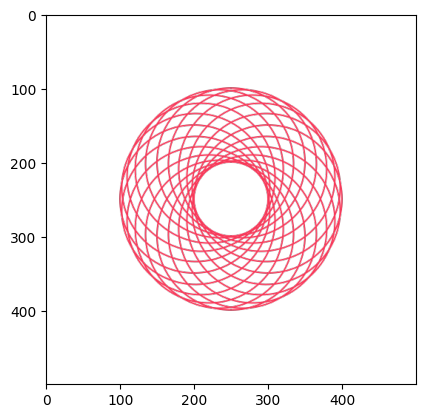

In [1]:
from shape_gen import Shape
import matplotlib.pyplot as plt

shape = Shape.from_name("concentric_circles")
plt.imshow(shape.array)

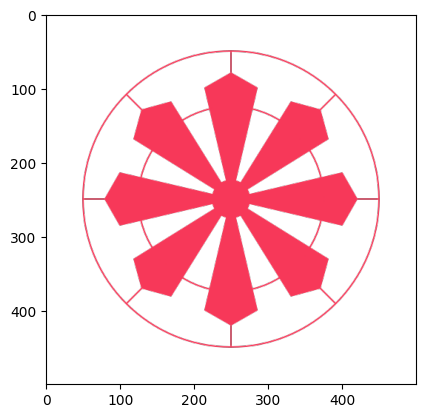

In [2]:
from shape_gen import Shape
import matplotlib.pyplot as plt

shape = Shape.from_name("jxcr_gear")
plt.imshow(shape.array)

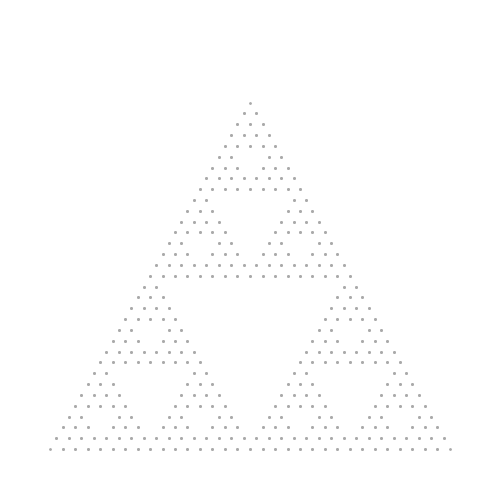

In [3]:
from shape_gen import Shape
import matplotlib.pyplot as plt

shape = Shape.from_name("sierpinski")
plt.imshow(shape.array)

# Testing
## Lets try doing it without svg.py

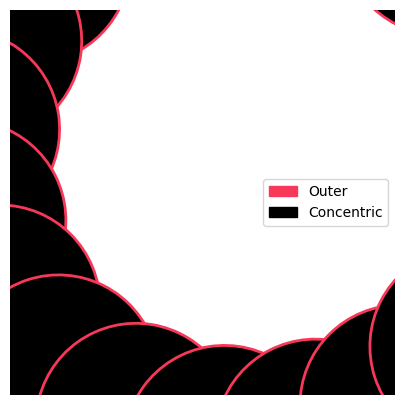

In [3]:
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from typing import List

strk_width = 2
radius_inner = -50  # 25


def circles_outer(num_rot, cent_x, cent_y, rad) -> List[Circle]:
    circles_lst = []
    angle = 360 / num_rot
    for i in range(num_rot):
        rotation = i * angle
        circles_lst.append(circle_outer(rotation, cent_x, cent_y, rad))
    return circles_lst


def circle_outer(rotation, cent_x, cent_y, rad, radius_inner=0) -> Circle:
    return Circle(
        (cent_x, cent_y - rad - radius_inner),
        radius=rad,
        edgecolor="#F73859",
        facecolor="#000000",
        linewidth=strk_width,
        transform=transforms.Affine2D().rotate_deg(rotation).translate(cent_x, cent_y),
    )


def circles_concentric(num_it, cent_x, cent_y, min_rad, max_rad) -> List[Circle]:
    circles_lst = []
    if num_it == 0:
        return []
    rad_increase = (max_rad - min_rad) / num_it  # (outer_rad - inner_rad) / num_it
    rad = min_rad
    while rad <= max_rad:
        circles_lst.append(circle_concentric(cent_x, cent_y, rad))
        rad += rad_increase
    return circles_lst


def circle_concentric(cent_x, cent_y, rad) -> Circle:
    return Circle(
        (cent_x, cent_y),
        radius=rad,
        edgecolor="black",
        facecolor="#000000",
        linewidth=strk_width,
    )


def concentric_circles(
    # circles concentric
    num_it=0,
    cent_x=250,
    cent_y=250,
    min_rad=radius_inner,
    max_rad=200,
    # circles outer
    num_rot=20,
    rad=100,
    width=500,
    height=500,
):
    circles_con = circles_concentric(num_it, cent_x, cent_y, min_rad, max_rad)
    circles_out = circles_outer(num_rot, cent_x, cent_y, rad)

    fig, ax = plt.subplots(figsize=(width / 100, height / 100))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_aspect("equal")
    ax.set_axis_off()
    for circle in circles_con:
        ax.add_patch(circle)
    for circle in circles_out:
        ax.add_patch(circle)
    ax.legend(
        handles=[
            Patch(facecolor="#F73859", edgecolor="#F73859", label="Outer"),
            Patch(facecolor="black", edgecolor="black", label="Concentric"),
        ]
    )
    plt.show()


concentric_circles()

## Failure.

In [12]:
import svg
import cairosvg
from io import BytesIO
import cv2
import numpy as np
from matplotlib import pyplot as plt
from typing import Union
from pathlib import Path
import os
import inspect

strk_width = 2
radius_inner = -50  # 25


def circles_outer(num_rot, cent_x, cent_y, rad):
    circles_lst = []
    angle = 360 / num_rot
    curr = 0
    for i in range(num_rot):
        curr = i * angle
        circles_lst.append(circle_outer(curr, cent_x, cent_y, rad))
    return circles_lst


def circle_outer(rotation, cent_x, cent_y, rad):
    return svg.Circle(
        cx=cent_x,
        cy=cent_y - rad - radius_inner,
        r=rad,
        stroke="#F73859",
        fill="transparent",
        stroke_width=strk_width,
        transform=[
            svg.Rotate(
                rotation, cent_x, cent_y
            )  # rotate wrt shape, 90=rotational value, x, y
        ],
    )


def circles_concentric(num_it, cent_x, cent_y, min_rad, max_rad):
    circles_lst = []
    if num_it == 0:
        return []
    rad_increase = (max_rad - min_rad) / num_it  # (outer_rad - inner_rad) / num_it
    rad = min_rad
    while rad <= max_rad:
        circles_lst.append(circle_concentric(cent_x, cent_y, rad))
        rad += rad_increase
    return circles_lst


def circle_concentric(cent_x, cent_y, rad):
    return svg.Circle(
        cx=cent_x,
        cy=cent_y,
        r=rad,
        stroke="black",
        fill="transparent",
        stroke_width=strk_width,
    )


def concentric_circles(
    outdir: Union[str, Path, BytesIO],
    num_it=0,
    cent_x=250,
    cent_y=250,
    min_rad=radius_inner,
    max_rad=200,
    # circles outer
    num_rot=20,
    rad=100,
    width=500,
    height=500,
) -> str:
    if not isinstance(outdir, BytesIO) and not os.path.isdir(outdir):
        raise ValueError(f"outdir must be valid a directory or BytesIO, got: {outdir}")
    circles_con = circles_concentric(num_it, cent_x, cent_y, min_rad, max_rad)
    circles_out = circles_outer(num_rot, cent_x, cent_y, rad)

    out = svg.SVG(width=width, height=height, elements=circles_con + circles_out)

    if not isinstance(outdir, BytesIO):
        outfile = os.path.join(
            os.path.abspath(outdir), f"{inspect.currentframe().f_code.co_name}.png"
        )
    else:
        outfile = outdir
    fig.savefig(outfile, transparent=True)
    return outfile


circles = concentric_circles()
# cairo svg to png using bytesio
with BytesIO() as f:
    concentric_circles()
    cairosvg.svg2png(bytestring=str(circles), write_to=f)
    f.seek(0)
    ref = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    rgb_ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
plt.tight_layout()
plt.imshow(rgb_ref)

IndentationError: unexpected indent (1860499648.py, line 72)

In [11]:
type(rgb_ref)

numpy.ndarray